# Goodreads Project

## Importing the libraries

In [94]:
# for data analysis
import numpy as np
import pandas as pd
import datetime as dt

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for ML
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## Importing the data

In [2]:
pwd

'C:\\Users\\evako\\Documents\\DSTI\\08_Python\\New_Project'

In [3]:
df = pd.read_csv(r"C:\Users\evako\Documents\DSTI\08_Python\New_Project\books1.csv",sep=",",index_col="bookID", encoding="iso-8859-1")

There was an isssue with the original data being switched to the left, that we fixed directly in the file by adding/removing a separator in the authors column. 

# Exploring the dataset

In [4]:
df.shape

(11127, 11)

We have 11 127 rows of data split over 11 columns

In [5]:
df.columns

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [6]:
df.index

Int64Index([    1,     2,     4,     5,     8,     9,    10,    12,    13,
               14,
            ...
            45617, 45623, 45625, 45626, 45630, 45631, 45633, 45634, 45639,
            45641],
           dtype='int64', name='bookID', length=11127)

The book_ID is the index of this dataset. Some rows seems to be missing, since we do not have for example the ID number 3, 6,7 or 11. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11127 entries, 1 to 45641
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11127 non-null  object 
 1   authors             11127 non-null  object 
 2   average_rating      11127 non-null  float64
 3   isbn                11127 non-null  object 
 4   isbn13              11127 non-null  float64
 5   language_code       11127 non-null  object 
 6     num_pages         11127 non-null  int64  
 7   ratings_count       11127 non-null  int64  
 8   text_reviews_count  11127 non-null  int64  
 9   publication_date    11127 non-null  object 
 10  publisher           11127 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.0+ MB


We can see that some columns are not being assigned the right data type (isbn13, publication date etc.). We will probably have to change that later for those columns that will be kept in our model. 

In [8]:
#Identifying columns with N/A / missing values
df.isna().sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [9]:
#Identifying columns with null values
df.isnull().sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [10]:
#Some basic statistics about our data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
average_rating,11127.0,3.933631e+00,3.524450e-01,0.000000e+00,3.770000e+00,3.960000e+00,4.135000e+00,5.000000e+00
isbn13,11127.0,9.759888e+12,4.428964e+11,8.987060e+09,9.780350e+12,9.780590e+12,9.780870e+12,9.790010e+12
num_pages,11127.0,3.363769e+02,2.411273e+02,0.000000e+00,1.920000e+02,2.990000e+02,4.160000e+02,6.576000e+03
ratings_count,11127.0,1.793641e+04,1.124794e+05,0.000000e+00,1.040000e+02,7.450000e+02,4.993500e+03,4.597666e+06
text_reviews_count,11127.0,5.418545e+02,2.576177e+03,0.000000e+00,9.000000e+00,4.600000e+01,2.375000e+02,9.426500e+04


In [11]:
#Having a look at the content of our dataframe
df.head(10)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9.780440e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9.780440e+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9.780440e+12,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9.780440e+12,eng,2690,41428,164,9/13/2004,Scholastic
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9.780980e+12,en-US,152,19,1,4/26/2005,Nimble Books
10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9.780440e+12,eng,3342,28242,808,9/12/2005,Scholastic
12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9.780520e+12,eng,815,3628,254,11/1/2005,Gramercy Books
13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9.780350e+12,eng,815,249558,4080,4/30/2002,Del Rey Books


### Changing data types 

In [12]:
#Removing the extra spacing at the start of the 'num_pages' column
df.columns = df.columns.str.replace(' ', '')

In [13]:
#Turn the publication_date type into datetime
df["publication_date"]=pd.to_datetime(df['publication_date'],errors='coerce')

In [14]:
#Turn the isbn13 column to text
df['isbn13'] = df['isbn13'].map(str)

In [15]:
#Checking the new datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11127 entries, 1 to 45641
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               11127 non-null  object        
 1   authors             11127 non-null  object        
 2   average_rating      11127 non-null  float64       
 3   isbn                11127 non-null  object        
 4   isbn13              11127 non-null  object        
 5   language_code       11127 non-null  object        
 6   num_pages           11127 non-null  int64         
 7   ratings_count       11127 non-null  int64         
 8   text_reviews_count  11127 non-null  int64         
 9   publication_date    11125 non-null  datetime64[ns]
 10  publisher           11127 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 1.0+ MB


We can see that our columns have now a more appropriate datatype relating to their individual content. 

# Data Analysis

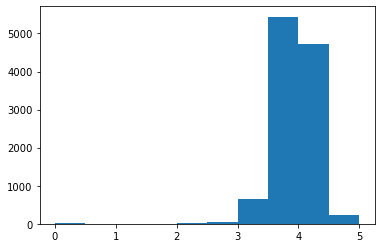

In [16]:
#Looking at the distribution of the average_rating column
plt.hist(df.average_rating)
plt.show()

We can see right away that our dataset is negatively skewed as most of the average ratings are between 3 and 5. It means that our dataset is not balanced at all and our model will be learning from the mode dominant rating, which will be those between 3.5 et 4.5. 

In [17]:
# Let's compute the average book rating by authors
df.groupby(["authors", "title"]).agg({"average_rating":"mean"}).head(10)

average_rating
authors                                            title                                                             
A.B. Yehoshua/Hillel Halkin                        A Woman in Jerusalem                                          3.43
                                                   The Liberated Bride                                           3.77
A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky       Notes from Underground & A Confession (Everyman...            3.76
A.E. Cunningham/Harlan Ellison/Charles F. Mille... Jack Vance: Critical Appreciations and a Biblio...            4.15
A.J. Jacobs                                        The Know-It-All: One Man's Humble Quest to Beco...            3.76
A.M. Homes                                         The Mistress's Daughter                                       3.28
A.N. Roquelaure/Anne Rice                          Beauty's Punishment                                           3.62
                                                   Beauty's Punishment (Sleeping Beauty  #2)                     3.62
                                                   Beauty's Release (Sleeping Beauty  #3)                        3.71
                                                   Sleeping Beauty Trilogy (Sleeping Beauty  #1-3)               3.99

In [18]:
df.authors.value_counts()

Stephen King                                              40
P.G. Wodehouse                                            40
Rumiko Takahashi                                          39
Orson Scott Card                                          35
Agatha Christie                                           33
                                                          ..
Ian Glasper                                                1
Legs McNeil/Gillian McCain                                 1
Adam Woog                                                  1
Mikal Gilmore                                              1
William T. Vollmann/Larry McCaffery/Michael Hemmingson     1
Name: authors, Length: 6643, dtype: int64

We can see that this count does not take into account the fact that some books have multiple authors, we will try and find a solution to see if this information is relevant or not for our dataset and prodictive model.

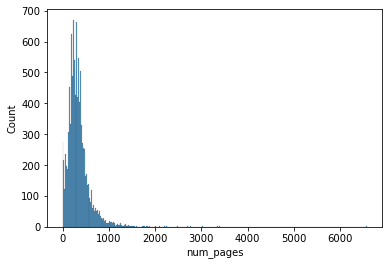

In [19]:
#Distribution of the number of pages
sns.histplot(data=df, x="num_pages")
plt.show()

<AxesSubplot:xlabel='num_pages', ylabel='average_rating'>

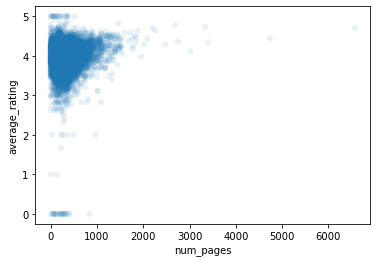

In [20]:
#Trying to find a relationship between the rating and the number of pages of a book. 
sns.scatterplot(data = df
                ,x = df.num_pages
                ,y = df.average_rating
                ,edgecolor = 'none'
                ,alpha = .1
                )

Most books seem to be under 2000 pages, we have a handful of books beyon the 3000 pages mark. 

In [21]:
#Book with more than 3000 pages and their rating
df.loc[df.num_pages > 3000,["title", "num_pages", "average_rating"]].sort_values(by=['num_pages'], ascending = False)

,title,num_pages,average_rating
bookID,,,
24520,The Complete Aubrey/Maturin Novels (5 Volumes),6576,4.70
25587,The Second World War,4736,4.45
44613,Remembrance of Things Past (Boxed Set),3400,4.34
10,Harry Potter Collection (Harry Potter #1-6),3342,4.73
25709,Summa Theologica 5 Vols,3020,4.12


C:\Users\evako\miniconda3\envs\marvel\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


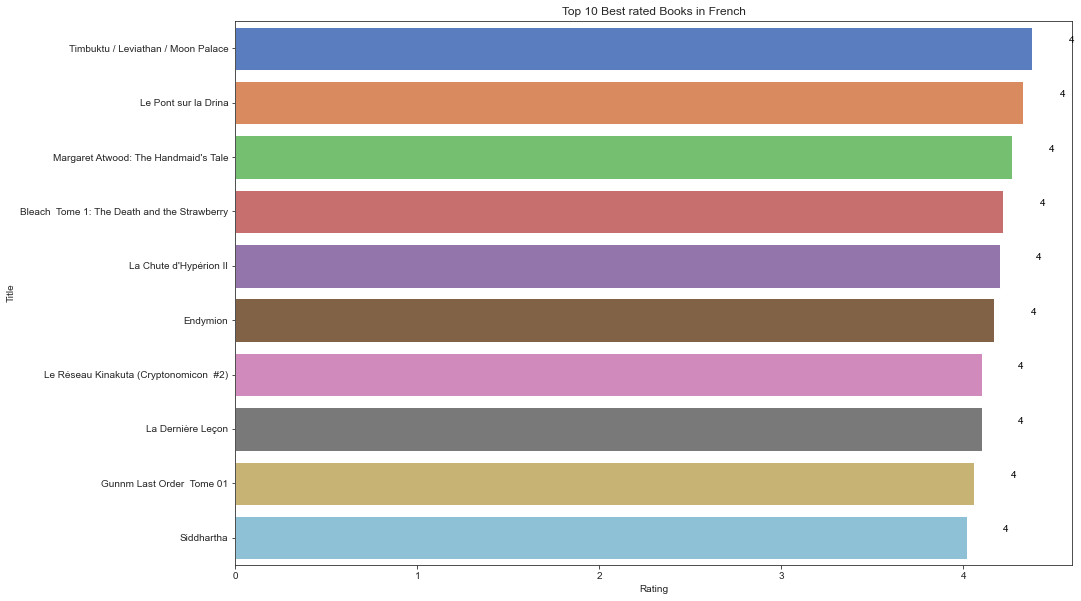

In [22]:
#Bar chart of the top10 rated books
### get df
top_10_books = df[(df['average_rating']>=4) & (df["language_code"]=="fre")]
top_10_books = top_10_books.head(10).sort_values(by=['average_rating'], ascending = False)

### set style
sns.set_style("ticks")

### set figure size
plt.figure(figsize=(15,10))

### plot
ax = sns.barplot(top_10_books['average_rating'], top_10_books['title'], palette='muted')
ax.set_xlabel("Rating")
ax.set_ylabel("Title")
ax.set_title('Top 10 Best rated Books in French')
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+0.3, str(round(i.get_width())), fontsize = 10, color = 'k')

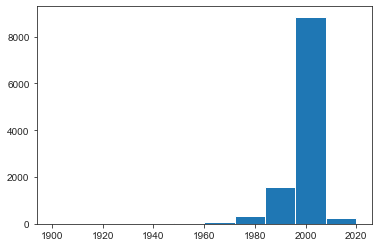

In [23]:
#Number of books published by year
plt.hist(df.publication_date.dt.year)
plt.show()

Most books in this dataset were published in recent years, in the 90s and early 2000s.
For ease of manipulation let's replace the publication date with the year, since we do not have any use of the publication year
We can see that ratings are mostly done on books' more modern editions. 

In [24]:
df['publication_year'] = df['publication_date'].dt.year.astype('Int64')

In [25]:
df.head(5)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year
bookID,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780440000000.0,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2006
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780440000000.0,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,2004
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780440000000.0,eng,352,6333,244,2003-11-01,Scholastic,2003
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780440000000.0,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,2004
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780440000000.0,eng,2690,41428,164,2004-09-13,Scholastic,2004


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11127 entries, 1 to 45641
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               11127 non-null  object        
 1   authors             11127 non-null  object        
 2   average_rating      11127 non-null  float64       
 3   isbn                11127 non-null  object        
 4   isbn13              11127 non-null  object        
 5   language_code       11127 non-null  object        
 6   num_pages           11127 non-null  int64         
 7   ratings_count       11127 non-null  int64         
 8   text_reviews_count  11127 non-null  int64         
 9   publication_date    11125 non-null  datetime64[ns]
 10  publisher           11127 non-null  object        
 11  publication_year    11125 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 1.4+ MB


Let's now look at the language distribution as a pie chart

In [27]:
#the 10 most used languages
df.language_code.value_counts()

eng      8911
en-US    1409
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

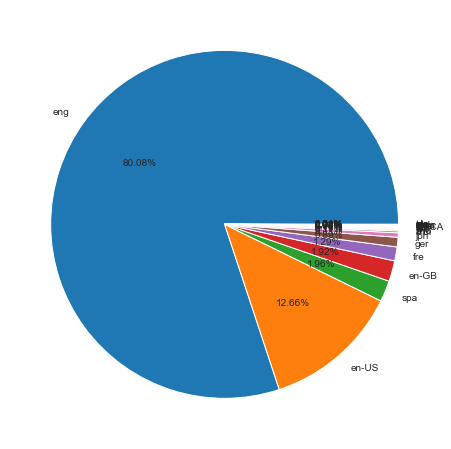

In [29]:
from matplotlib.pyplot import figure
figure(figsize=(10,8))
plt.pie(df.language_code.value_counts(),labels=df.language_code.value_counts().index,autopct='%1.2f%%')
plt.show()

This is not really readable as there are many languages appearing only once. We will fix this in the feature engineering step. 

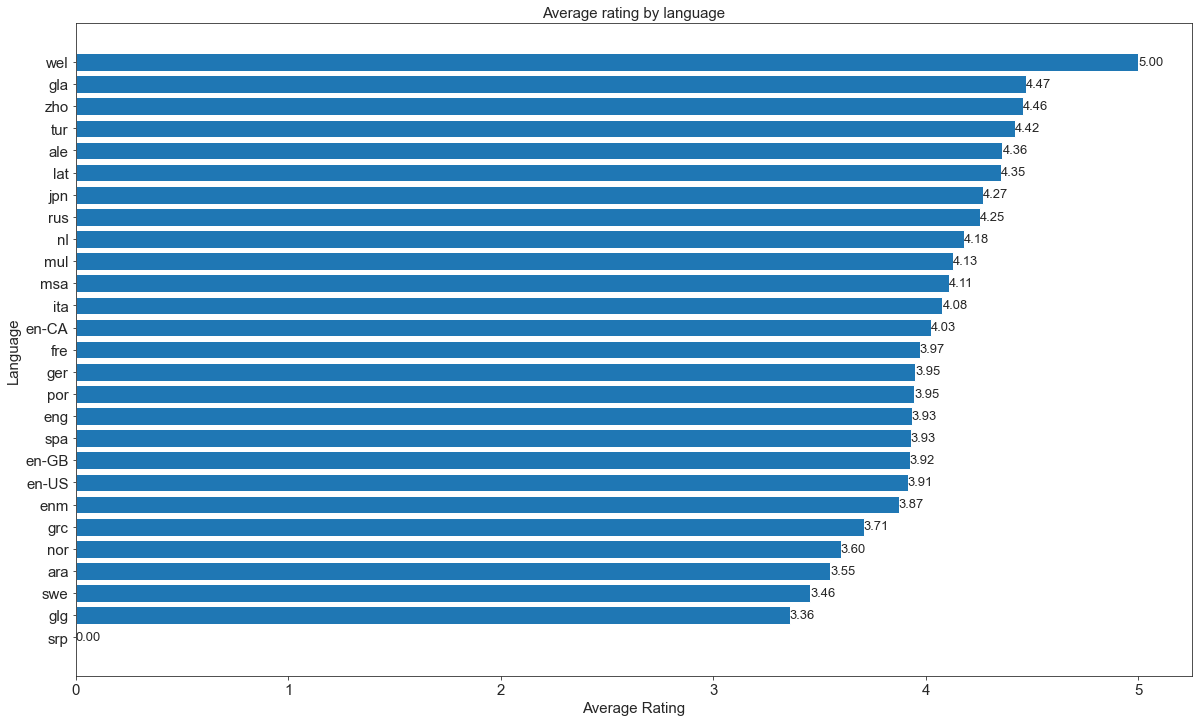

In [31]:
#average by language
lang_rating = df.groupby(["language_code"])["average_rating"].mean().reset_index().sort_values( by=["average_rating"],ascending = True)

x_pos = np.arange(len(lang_rating))

#sizing the graph    

figure(figsize=(20,12))

lgr=plt.barh(lang_rating["language_code"], lang_rating["average_rating"])

#fontsize of tick labels
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#Titles of the graph
plt.title('Average rating by language', fontsize =15)
plt.xlabel('Average Rating', fontsize =15)
plt.ylabel('Language', fontsize =15)

#label on the bars
plt.bar_label(lgr,fmt='%.2f', fontsize =13)



# Show graph
plt.show()

# Feature Engineering

In this step, we will try to select the columns we need to build our model. 
We will remove the highly descriptive features such as the title andd isbn codes, then we willtry to turn our whole dataset into a numerical one, by encoding the data we have

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11127 entries, 1 to 45641
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               11127 non-null  object        
 1   authors             11127 non-null  object        
 2   average_rating      11127 non-null  float64       
 3   isbn                11127 non-null  object        
 4   isbn13              11127 non-null  object        
 5   language_code       11127 non-null  object        
 6   num_pages           11127 non-null  int64         
 7   ratings_count       11127 non-null  int64         
 8   text_reviews_count  11127 non-null  int64         
 9   publication_date    11125 non-null  datetime64[ns]
 10  publisher           11127 non-null  object        
 11  publication_year    11125 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 1.4+ MB


### Languages

We can see that the english language has many subgroups, let's put them all into the same category

In [33]:
#Unifying all the english sub groups into the eng primary group in a new column. 
df['lang_code'] = df['language_code'].replace(['en-US', 'en-CA', 'en-GB'], 'eng')

In [34]:
#grouping all the other languages (non top 10) in an "Other languages" group labeled "oth"
df['lang_code'] = df['lang_code'].replace(['enm','lat','swe','rus','srp','nl','msa','glg','wel','ara','nor','tur','gla','ale'], 'oth')

In [35]:
#Getting the top 10 languages
df.lang_code.value_counts()

eng    10541
spa      218
fre      144
ger       99
jpn       46
oth       20
mul       19
zho       14
grc       11
por       10
ita        5
Name: lang_code, dtype: int64

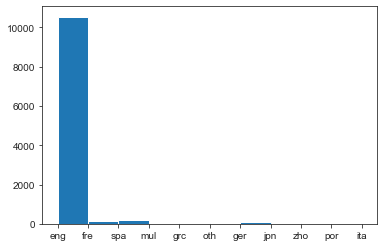

In [36]:
plt.hist(df.lang_code)
plt.show()

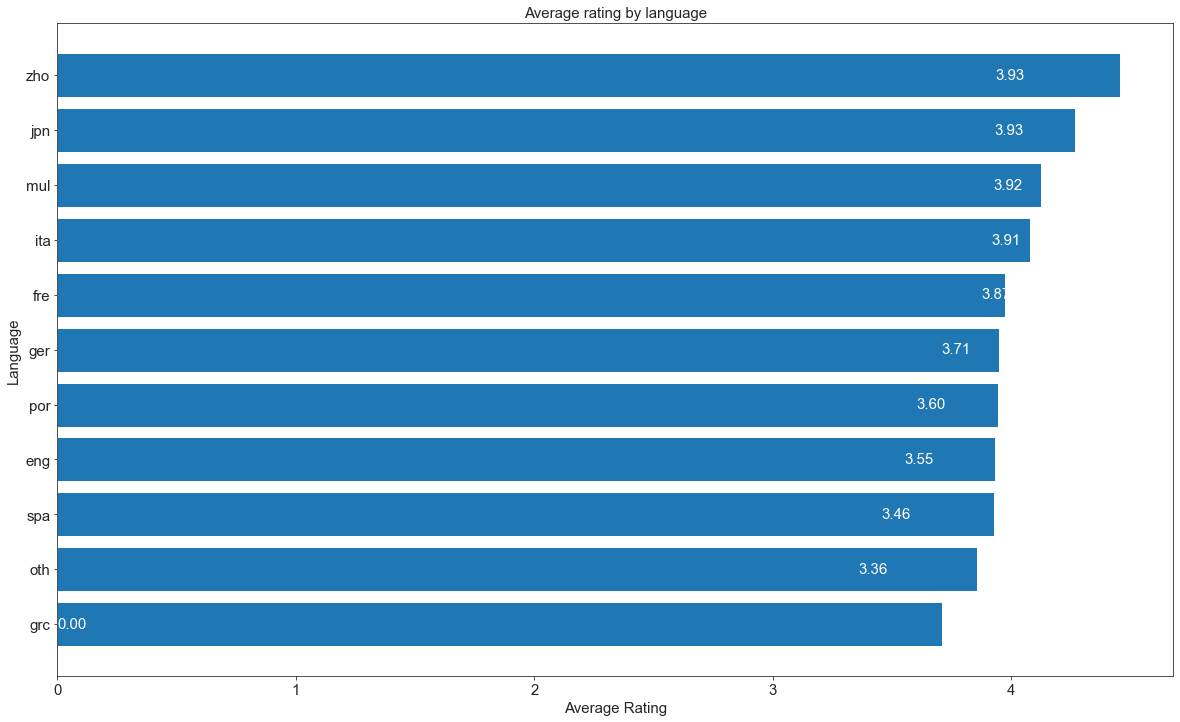

In [37]:
#average by language
lang_rating1 = df.groupby(["lang_code"])["average_rating"].mean().reset_index().sort_values( by=["average_rating"],ascending = True)

x_pos = np.arange(len(lang_rating1))

#sizing the graph    
from matplotlib.pyplot import figure
figure(figsize=(20,12))

plt.barh(lang_rating1["lang_code"], lang_rating1["average_rating"])

#fontsize of tick labels
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#Titles of the graph
plt.title('Average rating by language', fontsize =15)
plt.xlabel('Average Rating', fontsize =15)
plt.ylabel('Language', fontsize =15)

#label on the bars
plt.bar_label(lgr,fmt='%.2f', fontsize =15, color ='white')



# Show graph
plt.show()

Once again, we can see that our dataset is heavily skewed in favor of english laguage books in terms of numbers, but now we see that the best rated are mostly the chine (ZHO) and Japanese (JPN) books. 

### Authors

Regarding the authors, it would be interesting to get an average rating for each of them even if they were just co-authoring a book. Let's try to see how many books have more than one author

We have 4565 books with multiple authors, which is 40% of all our books. We could try to isolate each author and get an author rating from the  initial database

In [38]:
#a new dataframe just for manipulating the authors
df_authors=df.copy()

In [39]:
df_authors.shape

(11127, 13)

In [40]:
#Exploding the authors 
df_authors["authors"]=df["authors"].str.split("/")
df_authors = df_authors.explode("authors")
df_authors.authors.value_counts()

Stephen King           99
William Shakespeare    93
J.R.R. Tolkien         55
Sandra Brown           48
Agatha Christie        47
                       ..
John Grigsby            1
Michael Wharton         1
Thad Carhart            1
Tess Uriza Holthe       1
Michael Hemmingson      1
Name: authors, Length: 9224, dtype: int64

In [41]:
df.authors.value_counts()

Stephen King                                              40
P.G. Wodehouse                                            40
Rumiko Takahashi                                          39
Orson Scott Card                                          35
Agatha Christie                                           33
                                                          ..
Ian Glasper                                                1
Legs McNeil/Gillian McCain                                 1
Adam Woog                                                  1
Mikal Gilmore                                              1
William T. Vollmann/Larry McCaffery/Michael Hemmingson     1
Name: authors, Length: 6643, dtype: int64

We see that there is a strong difference in the books counts per authors, as Stephen King is the single author of 40 books but is actually credited as the author of 99 books. 
Now let's try and fing the real average rating for each author

In [42]:
df_authors.shape

(19245, 13)

In [43]:
#find a list of all books written by a certain author
df_authors[df_authors['authors'].str.contains('Bill Bryson')].head(10)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year,lang_code
bookID,,,,,,,,,,,,,
21,A Short History of Nearly Everything,Bill Bryson,4.21,076790818X,9780770000000.0,eng,544,248558,9396,2004-09-14,Broadway Books,2004,eng
22,Bill Bryson's African Diary,Bill Bryson,3.44,0767915062,9780770000000.0,eng,55,7270,499,2002-12-03,Broadway Books,2002,eng
23,Bryson's Dictionary of Troublesome Words: A Wr...,Bill Bryson,3.87,0767910435,9780770000000.0,eng,256,2088,131,2004-09-14,Broadway Books,2004,eng
24,In a Sunburned Country,Bill Bryson,4.07,0767903862,9780770000000.0,eng,335,72451,4245,2001-05-15,Broadway Books,2001,eng
25,I'm a Stranger Here Myself: Notes on Returning...,Bill Bryson,3.90,076790382X,9780770000000.0,eng,304,49240,2211,2000-06-28,Broadway Books,2000,eng
26,The Lost Continent: Travels in Small Town America,Bill Bryson,3.83,0060920084,9780060000000.0,eng,299,45712,2257,1990-08-28,William Morrow Paperbacks,1990,eng
27,Neither Here nor There: Travels in Europe,Bill Bryson,3.86,0380713802,9780380000000.0,eng,254,48701,2238,1993-03-28,William Morrow Paperbacks,1993,eng
28,Notes from a Small Island,Bill Bryson,3.91,0380727501,9780380000000.0,eng,324,80609,3301,1997-05-28,William Morrow Paperbacks,1997,eng
29,The Mother Tongue: English and How It Got That...,Bill Bryson,3.93,0380715430,9780380000000.0,eng,270,28489,2085,1991-09-28,William Morrow Paperbacks,1991,eng


In [44]:
#average rating of books from all authors
dfa2 = df_authors.groupby(["authors"]).mean().reset_index()
dfa2.columns = dfa2.columns.str.replace('average_rating', 'authors_avg_rating')
dfa2

,authors,authors_avg_rating,num_pages,ratings_count,text_reviews_count,publication_year
0,? ?,3.830000,183.000000,3.515000e+03,339.000000,2006.0
1,?? ?,4.430000,195.000000,2.270000e+02,38.000000,2004.0
2,?? ??,4.138571,246.571429,8.787143e+02,31.714286,2005.714286
3,?? ???,4.147500,259.000000,6.847500e+02,52.500000,2004.0
4,?? ??? ??????,3.930000,48.000000,2.737000e+03,83.000000,1998.0
...,...,...,...,...,...,...
9219,Åsne Seierstad,3.763333,291.333333,1.168467e+04,830.333333,2003.666667
9220,Émile Zola,3.971111,459.444444,4.329444e+03,165.111111,1999.777778
9221,Éric-Emmanuel Schmitt,3.820000,85.000000,9.750000e+02,62.000000,2001.0
9222,Íñigo Jáuregui,3.780000,128.000000,1.369000e+03,101.000000,2002.0


It works but there is a problem with the encoding

In [45]:
#Combining the datasets to include the authors
dfa_authors_new= pd.merge(df_authors, dfa2, on="authors")
dfa_authors_new

,title,authors,average_rating,isbn,isbn13,language_code,num_pages_x,ratings_count_x,text_reviews_count_x,publication_date,publisher,publication_year_x,lang_code,authors_avg_rating,num_pages_y,ratings_count_y,text_reviews_count_y,publication_year_y
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,0439785960,9780440000000.0,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2006,eng,4.500000,664.04,370611.480000,5470.880000,2003.2
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,0439358078,9780440000000.0,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,2004,eng,4.500000,664.04,370611.480000,5470.880000,2003.2
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780440000000.0,eng,352,6333,244,2003-11-01,Scholastic,2003,eng,4.500000,664.04,370611.480000,5470.880000,2003.2
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,043965548X,9780440000000.0,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,2004,eng,4.500000,664.04,370611.480000,5470.880000,2003.2
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,0439682584,9780440000000.0,eng,2690,41428,164,2004-09-13,Scholastic,2004,eng,4.500000,664.04,370611.480000,5470.880000,2003.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19240,O Sobrinho do Mágico (As Crónicas de Nárnia #1),Ana Falcão Bastos,4.04,9722329987,9789720000000.0,por,147,396,37,2003-04-08,Editorial Presença,2003,por,4.001667,160.00,221.833333,18.666667,2003.5
19241,A Viagem do Caminheiro da Alvorada (As Crónica...,Ana Falcão Bastos,4.09,9722331329,9789720000000.0,por,176,161,14,2004-09-01,Editorial Presença,2004,por,4.001667,160.00,221.833333,18.666667,2003.5
19242,O Príncipe Caspian (As Crónicas de Nárnia #4),Ana Falcão Bastos,3.97,9722330977,9789720000000.0,por,160,215,11,2003-10-11,Editorial Presença,2003,por,4.001667,160.00,221.833333,18.666667,2003.5
19243,Expelled from Eden: A William T. Vollmann Reader,Larry McCaffery,4.06,1560254416,9781560000000.0,eng,512,156,20,2004-12-21,Da Capo Press,2004,eng,4.060000,512.00,156.000000,20.000000,2004.0


In [46]:
dfa_authors_new.loc[dfa_authors_new.authors == "J.R.R. Tolkien"]

,title,authors,average_rating,isbn,isbn13,language_code,num_pages_x,ratings_count_x,text_reviews_count_x,publication_date,publisher,publication_year_x,lang_code,authors_avg_rating,num_pages_y,ratings_count_y,text_reviews_count_y,publication_year_y
76,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.59,0345538374,9780350000000.0,eng,1728,101233,1550,2012-09-25,Ballantine Books,2012,eng,4.218,473.272727,102223.327273,1141.890909,2000.181818
77,The Lord of the Rings (The Lord of the Rings ...,J.R.R. Tolkien,4.50,0618517650,9780620000000.0,eng,1184,1710,91,2004-10-21,Houghton Mifflin Harcourt,2004,eng,4.218,473.272727,102223.327273,1141.890909,2000.181818
78,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,0618346252,9780620000000.0,eng,398,2128944,13670,2003-09-05,Houghton Mifflin Harcourt,2003,eng,4.218,473.272727,102223.327273,1141.890909,2000.181818
79,The Lord of the Rings (The Lord of the Rings ...,J.R.R. Tolkien,4.50,0618260587,9780620000000.0,en-US,1216,1618,140,2002-10-01,Houghton Mifflin Harcourt,2002,eng,4.218,473.272727,102223.327273,1141.890909,2000.181818
80,The Letters of J.R.R. Tolkien,J.R.R. Tolkien,4.15,0618056998,9780620000000.0,eng,502,4689,171,2000-06-06,Mariner Books,2000,eng,4.218,473.272727,102223.327273,1141.890909,2000.181818
81,The History of the Lord of the Rings (The Hist...,J.R.R. Tolkien,4.38,0618083553,9780620000000.0,en-US,1680,237,3,2000-09-01,Mariner Books,2000,eng,4.218,473.272727,102223.327273,1141.890909,2000.181818
82,The Languages of Tolkien's Middle-Earth,J.R.R. Tolkien,3.98,0395291305,9780400000000.0,eng,207,4685,74,1980-05-28,Houghton Mifflin Company,1980,eng,4.218,473.272727,102223.327273,1141.890909,2000.181818
83,The Lord of the Rings- 3 volumes set (The Lord...,J.R.R. Tolkien,4.50,0618574999,9780620000000.0,en-US,1438,232,9,2005-06-01,Mariner Books,2005,eng,4.218,473.272727,102223.327273,1141.890909,2000.181818
84,Farmer Giles of Ham,J.R.R. Tolkien,3.85,0618009361,9780620000000.0,eng,127,5526,225,1999-11-15,Houghton Mifflin Harcourt,1999,eng,4.218,473.272727,102223.327273,1141.890909,2000.181818
85,The Lord of the Rings (The Lord of the Rings ...,J.R.R. Tolkien,4.50,0007136587,9780010000000.0,eng,1200,682,43,2002-09-16,Not Avail,2002,eng,4.218,473.272727,102223.327273,1141.890909,2000.181818


In [47]:
dfa_authors_new.shape

(19245, 18)

In [48]:
#We will group the titles and get the authors book rating average for each authors
dfa3 = dfa_authors_new.groupby("title").agg({"authors_avg_rating":"mean"}).reset_index()
dfa3

,title,authors_avg_rating
0,said the shotgun to the head.,4.220000
1,$30 Film School: How to Write Direct Produce...,3.490000
2,'Salem's Lot,4.003590
3,1 000 Places to See Before You Die,3.850000
4,10 lb Penalty,3.956207
...,...,...
10346,sex.lies.murder.fame.,3.790000
10347,¡Horton escucha a quién!,4.160455
10348,¿Quién te lo ha contado?,3.740000
10349,À tout jamais,3.975789


In [49]:
#include the authors average rating into the orignal dataframe
df_new= pd.merge(df, dfa3, on ="title")
df_new

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year,lang_code,authors_avg_rating
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780440000000.0,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2006,eng,4.516111
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,0747584664,9780750000000.0,eng,768,1213,78,2006-06-23,Bloomsbury Publishing,2006,eng,4.516111
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780440000000.0,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,2004,eng,4.524167
3,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780440000000.0,eng,352,6333,244,2003-11-01,Scholastic,2003,eng,4.516111
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,0439064864,9780440000000.0,eng,341,2293963,34692,1999-06-02,Arthur A. Levine Books / Scholastic Inc.,1999,eng,4.516111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560000000.0,eng,512,156,20,2004-12-21,Da Capo Press,2004,eng,4.022917
11123,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140000000.0,eng,635,783,56,1988-12-01,Penguin Books,1988,eng,3.948750
11124,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140000000.0,eng,415,820,95,1993-08-01,Penguin Books,1993,eng,3.948750
11125,Poor People,William T. Vollmann,3.72,0060878827,9780060000000.0,eng,434,769,139,2007-02-27,Ecco,2007,eng,3.948750


### Number of authors per book 

In [50]:
#create a column with the number of authors per book
df_new["nb_authors"]= df_new.authors.str.split("/", expand=False).agg(len)
df_new

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year,lang_code,authors_avg_rating,nb_authors
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780440000000.0,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2006,eng,4.516111,2
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,0747584664,9780750000000.0,eng,768,1213,78,2006-06-23,Bloomsbury Publishing,2006,eng,4.516111,1
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780440000000.0,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,2004,eng,4.524167,2
3,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780440000000.0,eng,352,6333,244,2003-11-01,Scholastic,2003,eng,4.516111,1
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,0439064864,9780440000000.0,eng,341,2293963,34692,1999-06-02,Arthur A. Levine Books / Scholastic Inc.,1999,eng,4.516111,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560000000.0,eng,512,156,20,2004-12-21,Da Capo Press,2004,eng,4.022917,3
11123,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140000000.0,eng,635,783,56,1988-12-01,Penguin Books,1988,eng,3.948750,1
11124,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140000000.0,eng,415,820,95,1993-08-01,Penguin Books,1993,eng,3.948750,1
11125,Poor People,William T. Vollmann,3.72,0060878827,9780060000000.0,eng,434,769,139,2007-02-27,Ecco,2007,eng,3.948750,1


In [51]:
df_new.nb_authors.value_counts()

1     6562
2     3080
3     1006
4      222
5       65
6       54
7       21
10      12
8       11
15      11
9       10
11       9
21       8
18       8
13       8
16       6
17       6
12       5
19       4
20       3
24       3
23       2
14       1
26       1
27       1
28       1
51       1
35       1
33       1
38       1
22       1
25       1
32       1
Name: nb_authors, dtype: int64

In [52]:
#The book with the most number of authors
df_new.loc[df_new.nb_authors== 32,["title", "average_rating"]]

,title,average_rating
10711,The Best American Comics 2006,3.87


### Book format

In [53]:
df_new["book_format"]= np.where(df_new['num_pages']==0,"audio","paper")
df_new

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year,lang_code,authors_avg_rating,nb_authors,book_format
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780440000000.0,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2006,eng,4.516111,2,paper
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,0747584664,9780750000000.0,eng,768,1213,78,2006-06-23,Bloomsbury Publishing,2006,eng,4.516111,1,paper
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780440000000.0,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,2004,eng,4.524167,2,paper
3,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780440000000.0,eng,352,6333,244,2003-11-01,Scholastic,2003,eng,4.516111,1,paper
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,0439064864,9780440000000.0,eng,341,2293963,34692,1999-06-02,Arthur A. Levine Books / Scholastic Inc.,1999,eng,4.516111,2,paper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560000000.0,eng,512,156,20,2004-12-21,Da Capo Press,2004,eng,4.022917,3,paper
11123,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140000000.0,eng,635,783,56,1988-12-01,Penguin Books,1988,eng,3.948750,1,paper
11124,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140000000.0,eng,415,820,95,1993-08-01,Penguin Books,1993,eng,3.948750,1,paper
11125,Poor People,William T. Vollmann,3.72,0060878827,9780060000000.0,eng,434,769,139,2007-02-27,Ecco,2007,eng,3.948750,1,paper


In [54]:
#The list of the audio books publishers
df_new.loc[df_new.book_format== "audio","publisher"].value_counts()

Random House Audio                     19
Tantor Media                            5
Simon & Schuster Audio                  5
Random House Value Publishing           4
Macmillan Audio                         4
Grand Central Publishing                3
Random House Audio Publishing Group     3
Ivy Books                               2
RH Audio                                2
Listening Library (Audio)               2
Audiogo                                 2
Basic Books                             2
Audio Renaissance                       1
Gold Eagle                              1
Fawcett                                 1
Fawcett Coventry                        1
Scholastic Audio Books                  1
Hachette Audio                          1
Mariner Books                           1
RH Audio Price-less                     1
Hay House                               1
AudioGO                                 1
Blackstone Audiobooks                   1
Moody Publishers                  

In [55]:
df_new.publisher.value_counts()

Vintage                              318
Penguin Books                        261
Penguin Classics                     184
Mariner Books                        150
Ballantine Books                     144
                                    ... 
Everyman Library / Overlook Press      1
Pelican Publishing Company             1
Penguin Classics Deluxe Edition        1
Delta Publishing                       1
ASCD                                   1
Name: publisher, Length: 2288, dtype: int64

In [56]:
#average rating per publisher by book format
df_new.groupby(["publisher","book_format"])["average_rating"].mean()

publisher              book_format
10/18                  paper          3.650000
1st Book Library       paper          3.580000
1st World Library      paper          4.180000
??                     paper          4.556250
???                    paper          4.243636
                                        ...   
rbooks                 paper          4.080000
Éditions 10/18         paper          4.020000
Éditions de L'Olivier  paper          3.820000
Éditions de Minuit     paper          3.830000
Éditions du Rocher     paper          3.330000
Name: average_rating, Length: 2317, dtype: float64

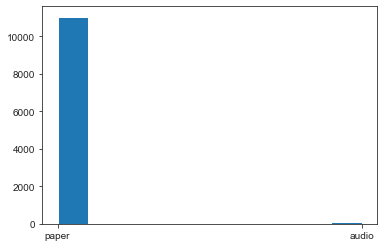

In [58]:
plt.hist(df_new.book_format)
plt.show()

Paper books are way more represented than audiobooks in the dataset

## Encoding the table for Machine Learning

Drop the columns not needed title authors publisher publication_date
encode:language code, book_format

#### Book format

In [60]:
df_new.loc[:,["book_format"]] = pd.get_dummies(df_new.book_format,drop_first=True).values
df_new
#1 = paper cover, 0 = audio book

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year,lang_code,authors_avg_rating,nb_authors,book_format
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780440000000.0,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2006,eng,4.516111,2,1
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,0747584664,9780750000000.0,eng,768,1213,78,2006-06-23,Bloomsbury Publishing,2006,eng,4.516111,1,1
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780440000000.0,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,2004,eng,4.524167,2,1
3,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780440000000.0,eng,352,6333,244,2003-11-01,Scholastic,2003,eng,4.516111,1,1
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,0439064864,9780440000000.0,eng,341,2293963,34692,1999-06-02,Arthur A. Levine Books / Scholastic Inc.,1999,eng,4.516111,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560000000.0,eng,512,156,20,2004-12-21,Da Capo Press,2004,eng,4.022917,3,1
11123,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140000000.0,eng,635,783,56,1988-12-01,Penguin Books,1988,eng,3.948750,1,1
11124,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140000000.0,eng,415,820,95,1993-08-01,Penguin Books,1993,eng,3.948750,1,1
11125,Poor People,William T. Vollmann,3.72,0060878827,9780060000000.0,eng,434,769,139,2007-02-27,Ecco,2007,eng,3.948750,1,1


In [61]:
#The list of the audio books publishers
df_new.book_format.value_counts()

1    11051
0       76
Name: book_format, dtype: int64

#### Language code

In [63]:
#we are going to create dummies for the language codes
df_new=pd.get_dummies(df_new,columns=['lang_code'])

#### Dropping the columns we don't need

In [64]:
df_final=df_new.drop(columns=['title','authors', 'isbn', 'isbn13','language_code','publication_date'], inplace=True)

In [65]:
df_new

,average_rating,num_pages,ratings_count,text_reviews_count,publisher,publication_year,authors_avg_rating,nb_authors,book_format,lang_code_eng,lang_code_fre,lang_code_ger,lang_code_grc,lang_code_ita,lang_code_jpn,lang_code_mul,lang_code_oth,lang_code_por,lang_code_spa,lang_code_zho
0,4.57,652,2095690,27591,Scholastic Inc.,2006,4.516111,2,1,1,0,0,0,0,0,0,0,0,0,0
1,4.57,768,1213,78,Bloomsbury Publishing,2006,4.516111,1,1,1,0,0,0,0,0,0,0,0,0,0
2,4.49,870,2153167,29221,Scholastic Inc.,2004,4.524167,2,1,1,0,0,0,0,0,0,0,0,0,0
3,4.42,352,6333,244,Scholastic,2003,4.516111,1,1,1,0,0,0,0,0,0,0,0,0,0
4,4.42,341,2293963,34692,Arthur A. Levine Books / Scholastic Inc.,1999,4.516111,2,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,4.06,512,156,20,Da Capo Press,2004,4.022917,3,1,1,0,0,0,0,0,0,0,0,0,0
11123,4.08,635,783,56,Penguin Books,1988,3.948750,1,1,1,0,0,0,0,0,0,0,0,0,0
11124,3.96,415,820,95,Penguin Books,1993,3.948750,1,1,1,0,0,0,0,0,0,0,0,0,0
11125,3.72,434,769,139,Ecco,2007,3.948750,1,1,1,0,0,0,0,0,0,0,0,0,0


In [66]:
df_final=df_new.drop(columns="publisher")

In [67]:
df_final

,average_rating,num_pages,ratings_count,text_reviews_count,publication_year,authors_avg_rating,nb_authors,book_format,lang_code_eng,lang_code_fre,lang_code_ger,lang_code_grc,lang_code_ita,lang_code_jpn,lang_code_mul,lang_code_oth,lang_code_por,lang_code_spa,lang_code_zho
0,4.57,652,2095690,27591,2006,4.516111,2,1,1,0,0,0,0,0,0,0,0,0,0
1,4.57,768,1213,78,2006,4.516111,1,1,1,0,0,0,0,0,0,0,0,0,0
2,4.49,870,2153167,29221,2004,4.524167,2,1,1,0,0,0,0,0,0,0,0,0,0
3,4.42,352,6333,244,2003,4.516111,1,1,1,0,0,0,0,0,0,0,0,0,0
4,4.42,341,2293963,34692,1999,4.516111,2,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,4.06,512,156,20,2004,4.022917,3,1,1,0,0,0,0,0,0,0,0,0,0
11123,4.08,635,783,56,1988,3.948750,1,1,1,0,0,0,0,0,0,0,0,0,0
11124,3.96,415,820,95,1993,3.948750,1,1,1,0,0,0,0,0,0,0,0,0,0
11125,3.72,434,769,139,2007,3.948750,1,1,1,0,0,0,0,0,0,0,0,0,0


## Making a correlation matrix

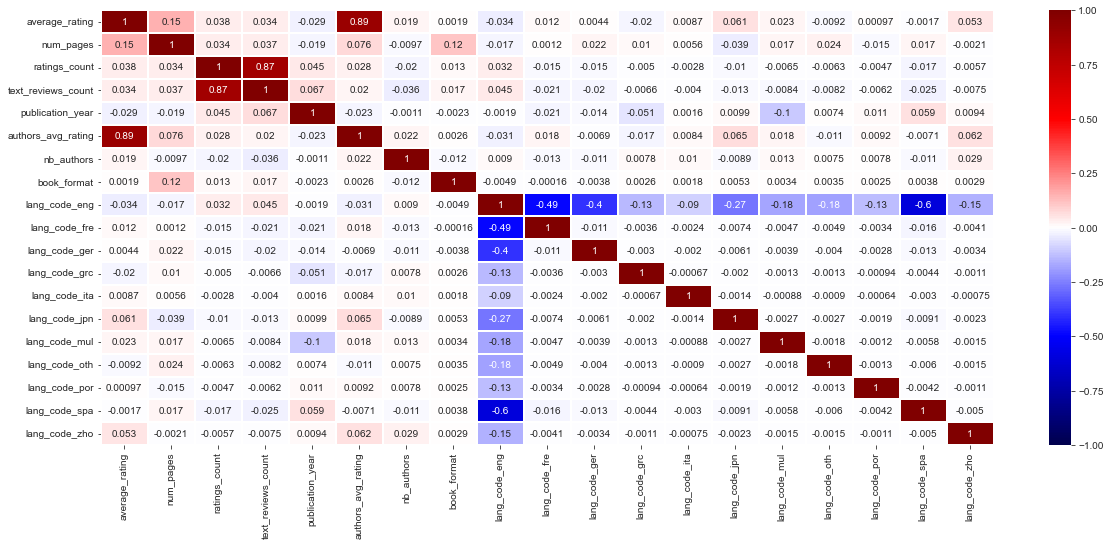

In [68]:
# Compute the correlation coefficient for all column pairs
plt.figure(figsize=(20,8))
corrMatrix = df_final.corr()

# Plot the correlation coefficient for all column pairs
sns.heatmap(corrMatrix, annot=True,linewidths=.2, cmap='seismic', vmin=-1, vmax=1)
plt.show()

We should drop the columns that are higly correlated, ie. ratings count/text_review_counts and authors average rating

In this case, we will treat our project as a regression model, trying to predict a close enough rating for a book. 

<AxesSubplot:xlabel='average_rating', ylabel='text_reviews_count'>

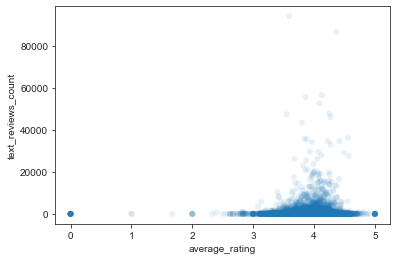

In [103]:
sns.scatterplot(data = df
                ,x = df.average_rating
                ,y = df.text_reviews_count
                ,edgecolor = 'none'
                ,alpha = .1
                )

# Case 1: having a regression problem

## Visualizing the imbalance of the data set

We are going to visualize the distribution of or target value, the average_rating (for a regression) and the rating (for a classification).

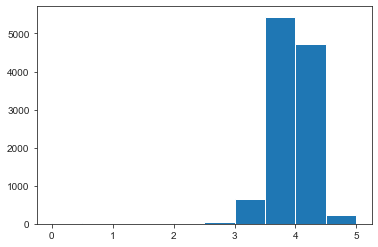

In [70]:
#Distribution for average_rating (regression)
plt.hist(df_final.average_rating)
plt.show()

We can see that the classes are especially only in the 4 rating. Most of the data is within the 3 and 5 range. 
Let's try to remove the rows that have a rating below 2.5 to keep a more balanced dataset. 


In [71]:
#Creating a subset dataframe where we have all books with rating > 2.5
df_final_reduced = df_final[df_final['average_rating']>2.5]
df_final_reduced

,average_rating,num_pages,ratings_count,text_reviews_count,publication_year,authors_avg_rating,nb_authors,book_format,lang_code_eng,lang_code_fre,lang_code_ger,lang_code_grc,lang_code_ita,lang_code_jpn,lang_code_mul,lang_code_oth,lang_code_por,lang_code_spa,lang_code_zho
0,4.57,652,2095690,27591,2006,4.516111,2,1,1,0,0,0,0,0,0,0,0,0,0
1,4.57,768,1213,78,2006,4.516111,1,1,1,0,0,0,0,0,0,0,0,0,0
2,4.49,870,2153167,29221,2004,4.524167,2,1,1,0,0,0,0,0,0,0,0,0,0
3,4.42,352,6333,244,2003,4.516111,1,1,1,0,0,0,0,0,0,0,0,0,0
4,4.42,341,2293963,34692,1999,4.516111,2,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,4.06,512,156,20,2004,4.022917,3,1,1,0,0,0,0,0,0,0,0,0,0
11123,4.08,635,783,56,1988,3.948750,1,1,1,0,0,0,0,0,0,0,0,0,0
11124,3.96,415,820,95,1993,3.948750,1,1,1,0,0,0,0,0,0,0,0,0,0
11125,3.72,434,769,139,2007,3.948750,1,1,1,0,0,0,0,0,0,0,0,0,0


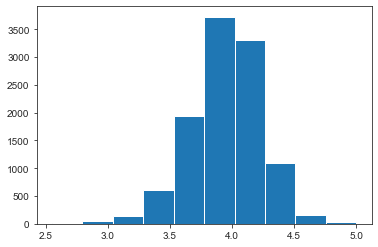

In [72]:
#Distribution for average_rating (regression)
plt.hist(df_final_reduced.average_rating)
plt.show()

This distribution seems to be more balanced than the previous one, we can now start to work on the ML modelling and prediction

## Splitting the data into train/test

In [73]:
#Splitting the dataset for the regression

In [74]:
df_train, df_test = train_test_split(df_final_reduced,test_size = 0.2)

In [75]:
len(df_final_reduced)

11089

In [76]:
len(df_train)

8871

In [77]:
len(df_test)

2218

In [78]:
df_train

,average_rating,num_pages,ratings_count,text_reviews_count,publication_year,authors_avg_rating,nb_authors,book_format,lang_code_eng,lang_code_fre,lang_code_ger,lang_code_grc,lang_code_ita,lang_code_jpn,lang_code_mul,lang_code_oth,lang_code_por,lang_code_spa,lang_code_zho
4822,4.45,232,90,4,1999,4.323750,3,1,0,0,0,0,0,0,0,0,0,1,0
5624,3.77,168,126,12,1999,3.816667,1,1,1,0,0,0,0,0,0,0,0,0,0
10572,3.93,672,4718,232,2005,4.003077,1,1,1,0,0,0,0,0,0,0,0,0,0
6633,4.17,1232,3873,459,1982,4.184286,2,1,1,0,0,0,0,0,0,0,0,0,0
1569,3.75,218,488,38,2004,3.820000,1,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7291,3.83,352,180,16,1999,3.853333,3,1,1,0,0,0,0,0,0,0,0,0,0
10376,3.73,248,937,41,2003,3.730000,1,1,1,0,0,0,0,0,0,0,0,0,0
6809,3.64,132,433,56,2002,3.525714,2,1,1,0,0,0,0,0,0,0,0,0,0
4016,3.71,446,2956,239,2006,3.662500,2,1,1,0,0,0,0,0,0,0,0,0,0


In [79]:
#Controling the consistency of the target data in each set
print(df_final_reduced.average_rating.mean())
print(df_train.average_rating.mean())
print(df_test.average_rating.mean())

3.945045540625824
3.9452000901814994
3.944427412082959


In [ ]:
#df_test.head(5)

In [80]:
df_test.columns

Index(['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_year', 'authors_avg_rating', 'nb_authors', 'book_format',
       'lang_code_eng', 'lang_code_fre', 'lang_code_ger', 'lang_code_grc',
       'lang_code_ita', 'lang_code_jpn', 'lang_code_mul', 'lang_code_oth',
       'lang_code_por', 'lang_code_spa', 'lang_code_zho'],
      dtype='object')

In [81]:
# get the values of the columns for the training data - removing the highly dependant features: text_reviews_count)
X_train = df_train.loc[:,['num_pages','ratings_count','nb_authors','book_format','lang_code_eng', 'lang_code_fre', 'lang_code_ger', 'lang_code_grc',
'lang_code_ita', 'lang_code_jpn', 'lang_code_mul', 'lang_code_oth','lang_code_por', 'lang_code_spa', 'lang_code_zho' ]].values
y_train = df_train.average_rating.values

In [82]:
# get the values of the columns for the test data
X_test = df_test.loc[:,['num_pages','ratings_count','nb_authors','book_format','lang_code_eng', 'lang_code_fre', 'lang_code_ger', 'lang_code_grc',
'lang_code_ita', 'lang_code_jpn', 'lang_code_mul', 'lang_code_oth','lang_code_por', 'lang_code_spa', 'lang_code_zho']].values
y_test = df_test.average_rating.values

In [83]:
X_test

array([[ 135,   29,    2, ...,    0,    0,    0],
       [ 205,  985,    2, ...,    0,    0,    0],
       [ 261,  186,    1, ...,    0,    0,    0],
       ...,
       [ 144,  148,    3, ...,    0,    0,    0],
       [  40, 8704,    1, ...,    0,    0,    0],
       [ 204,  293,    1, ...,    0,    1,    0]], dtype=int64)

## Linear regression

In [84]:
ln = LinearRegression()

In [85]:
ln.fit(X=X_train,y=y_train)

LinearRegression()

In [86]:
y_test_pred = ln.predict(X_test)
y_test_pred

array([3.89967017, 3.91455889, 3.92138027, ..., 3.90653519, 3.87539612,
       3.88513145])

In [87]:
from sklearn.metrics import mean_absolute_error

In [91]:
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Linear Regression metrics:')
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Linear Regression metrics:
Mean absolute error: 0.22
Mean squared error: 0.08
Root mean squared error: 0.28


In [89]:
y_test

array([3.9 , 4.22, 4.41, ..., 3.07, 4.22, 3.66])

In [90]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_test_pred.squeeze()})
print(df_preds)

      Actual  Predicted
0       3.90   3.899670
1       4.22   3.914559
2       4.41   3.921380
3       4.76   3.905502
4       3.65   3.923443
...      ...        ...
2213    3.53   3.927163
2214    4.02   3.991145
2215    3.07   3.906535
2216    4.22   3.875396
2217    3.66   3.885131

[2218 rows x 2 columns]


In [ ]:
#Regression end here

## Random Forest

In [95]:
rf = RandomForestRegressor()

In [96]:
rf.fit(X=X_train,y=y_train)

RandomForestRegressor()

In [97]:
y_test_pred_rf = rf.predict(X_test)

In [99]:
df_preds_rf = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_test_pred_rf.squeeze()})
print(df_preds_rf)

      Actual  Predicted
0       3.90   3.816833
1       4.22   4.105100
2       4.41   3.872533
3       4.76   4.049000
4       3.65   3.890100
...      ...        ...
2213    3.53   3.759500
2214    4.02   3.664700
2215    3.07   4.090600
2216    4.22   4.154500
2217    3.66   3.797800

[2218 rows x 2 columns]


In [98]:
mae = metrics.mean_absolute_error(y_test, y_test_pred_rf)
mse = metrics.mean_squared_error(y_test, y_test_pred_rf)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rf))
print('Random_Forrest metrics:')
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Random_Forrest metrics:
Mean absolute error: 0.23
Mean squared error: 0.09
Root mean squared error: 0.30
